# 1.0.0 Parse Keywords

In [7]:
import pandas as pd
import requests
from glob import glob
import json

In [3]:
all_files = glob('../markdown_files/*.md')
len(all_files)

82

In [3]:
url = 'https://connect.biorxiv.org/relate/collection_json.php?grp=181'

In [4]:
r = requests.get(url)

In [9]:
req_dict = json.loads(r.text)

In [38]:
stop_words = ["i","me","my","myself","we","us","our","ours","ourselves","you","your","yours","yourself","yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself","they","them","their","theirs","themselves","what","which","who","whom","whose","this","that","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did","doing","will","would","should","can","could","ought","i'm","you're","he's","she's","it's","we're","they're","i've","you've","we've","they've","i'd","you'd","he'd","she'd","we'd","they'd","i'll","you'll","he'll","she'll","we'll","they'll","isn't","aren't","wasn't","weren't","hasn't","haven't","hadn't","doesn't","don't","didn't","won't","wouldn't","shan't","shouldn't","can't","cannot","couldn't","mustn't","let's","that's","who's","what's","here's","there's","when's","where's","why's","how's","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into","through","during","before","after","above","below","to","from","up","upon","down","in","out","on","off","over","under","again","further","then","once","here","there","when","where","why","how","all","any","both","each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too","very","say","says","said","shall","2019","novel","patients","using","may","2019-ncov","2020"]
stop_words.extend(['2020,', 'conclusions', 'characteristics'])

In [39]:
doi_words = {}
all_words = []
arr_papers = req_dict['rels']
for inst_paper in arr_papers:

    # get words from abstract
    inst_words = [x.lower().replace(':','') for x in inst_paper['rel_abs'].split()]
    inst_words = [x for x in inst_words if x not in stop_words]    
    
    # save words to dict 
    doi_words[inst_paper['rel_doi']] = sorted(list(set(inst_words)))
    
    all_words.extend(inst_words)

In [51]:
len(arr_papers)

1146

In [56]:
ser_count = pd.Series(all_words).value_counts()

ser_count = ser_count[ser_count < len(arr_papers) * 0.75 ][ser_count > 5]
ser_count.shape

(3807,)

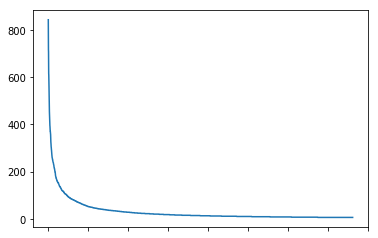

In [57]:
ser_count.plot()

In [59]:
ser_count.index.tolist()

['coronavirus',
 'disease',
 'number',
 'data',
 'results',
 'clinical',
 'epidemic',
 'severe',
 'model',
 'outbreak',
 'infection',
 'china',
 'health',
 'transmission',
 'confirmed',
 'virus',
 'study',
 'viral',
 'respiratory',
 'infected',
 'methods',
 'public',
 'wuhan',
 'risk',
 'used',
 'spread',
 'time',
 'reported',
 'also',
 'based',
 'rate',
 'control',
 'high',
 'early',
 'two',
 'different',
 'case',
 'measures',
 'analysis',
 'background',
 'february',
 'human',
 'covid-19.',
 'higher',
 'first',
 'january',
 'found',
 'countries',
 'days',
 'new',
 '2020.',
 '(covid-19)',
 'potential',
 'among',
 'including',
 'wuhan,',
 'compared',
 'china.',
 'however,',
 'hospital',
 'total',
 'pneumonia',
 'march',
 'one',
 'acute',
 'protein',
 'global',
 'population',
 'estimated',
 'hubei',
 'age',
 'patients.',
 'showed',
 'estimate',
 'social',
 'treatment',
 'symptoms',
 'current',
 'pandemic',
 'effective',
 'findings',
 'caused',
 'associated',
 'identified',
 'mortality',


In [20]:
words_list = []
for inst_file in all_files:
    f = open(inst_file, 'r')
    lines = f.readlines()
    f.close()
    
    for inst_line in lines:
        inst_line = inst_line.lower()
        
#         if 'keyword' in inst_line:
            
        inst_words = inst_line.split(' ')
        inst_words = [x for x in inst_words if '*' not in x]
        words_list.extend(inst_words)

In [23]:
pd.Series(words_list).value_counts().head(50)

              1972
the           1162
of            1089
and            868
\n             853
in             725
to             587
a              353
patients       340
with           327
that           255
for            230
this           223
were           203
as             199
is             188
by             185
be             156
from           149
-              144
covid-19       142
study          141
was            137
sars-cov-2     136
the\n          134
not            130
on             124
authors        123
viral          122
disease        121
clinical       120
and\n          115
or             109
of\n           106
are            102
at              97
severe          94
cells           91
these           89
it              88
data            70
cell            68
an              67
in\n            66
also            66
t               66
infection       65
may             62
to\n            62
have            61
dtype: int64